In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LA_X_df, get_y_df, data_prep
from model_arch import build_LA_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.15.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.15.0
Tensorflow version: 2.15.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.15.0


In [3]:
data_filepath = "../../../data/csv/EXP1&2DATA.csv"
checkpoint_filepath = "../../../data/csv/"

In [4]:
df = pd.read_csv(data_filepath)
df['LA_mm2'].mean()

757.5074989059082

In [5]:
X = get_LA_X_df(data_filepath)
y = get_y_df(data_filepath, "LA_mm2")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [6]:
model = build_LA_model()
print('Input shape:', X_train[0].shape)


Input shape: (20,)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

In [8]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2
)

Epoch 1/1000

11/11 [==============================] - 1s 17ms/step - loss: 769.6464 - val_loss: 717.5269
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.6132 - val_loss: 717.5447
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.5800 - val_loss: 717.5521
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.5467 - val_loss: 717.5527
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.5136 - val_loss: 717.5496
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.4803 - val_loss: 717.5366
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.4470 - val_loss: 717.5182
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.4136 - val_loss: 717.5066
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step - loss: 769.3801 - val_loss: 717.4887
Epoch 10/1000
11/11 [==============================] - 0s 4ms/

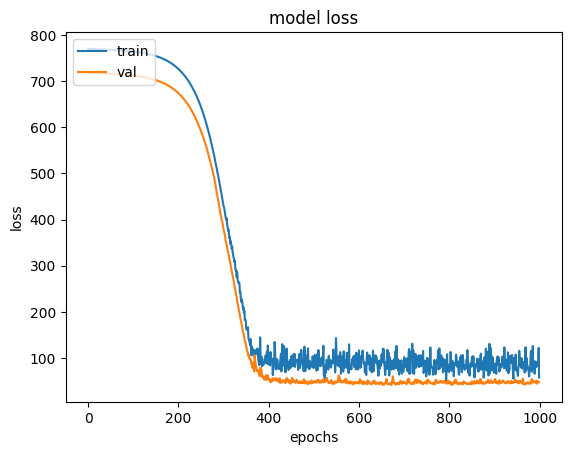

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 29.8298


29.829801559448242

In [11]:
figures_filepath = "../../../figures/LA_error_csv"
generate_csv(model, X_test, y_test, "LA_predictions", "LA_actual", figures_filepath)

2/2 [==============================] - 0s 3ms/step
